# Introduction

In this laboratory, you will get acquainted to the basic visualization techniques for the Exploratory Data Analysis (EDA). You will deal with charts to
- analyze a data distribution, like **histograms**, **boxplots** and **violin plots**
- explore relationships and (linear) correlations in your data, like **scatterplots** or **heatmaps**
- visualize the trend and some salient information of a **time series**.

Choosing the right type of chart for the type of data at hand is a never ending job. Some [communities](https://www.reddit.com/r/dataisbeautiful/) took it seriously since a while. You will soon find yourself eager to test many approaches: this laboratory will help you getting started.  

## Structure

Each main section of the notebook introduces one of the chart categories listed above. Within the sections, you will find a brief description of type of plot you are required to build, along with a short snippet of code that produces the chart on syntetic data.

The whole notebook is written in **Python**. The code level is introductory: if your are a Python master, bear with me. On the other hand, not all the functions are described, but their functioning can be easily inferred either by the name or the output.   

For your convenience, some parts of the notebook are pre-compiled, we filled the boilerplate code for you. Although the notebook is sequential, each section is self-contained: feel free to skip back and forth you are more interested in specific parts.
  
---
 
So, to recap. Let's say your client provides you and your team a large set of raw, unprocessed data and you are the one in charge to do a first EDA pass. And you happen to know Python.

![Data Viz](https://venngage-wordpress.s3.amazonaws.com/uploads/2020/06/image17.png)

# Before we start: Python & Co.

Python is the *standard de-facto* ecosystem for data scientists and practitionaires. If I had to summarized its advantages over other languages like R, or even some GUI-enabled tools, I would say:

- a large, well-documented standard library, and a *huge* number of third-part libraries for virtually *everything* you need
- a large, supportive community with a lot of resources
- modern Python keeps the syntax at a minimum. To run data science and visualization experiments, the python code almost reduces to *plain english*
- a series of online tools that let you experiment with the language: you only need a Google Account to create [Colab](https://colab.research.google.com/notebook) Notebooks, and the same applies for [Kaggle](https://www.kaggle.com/), [Deepnote](https://deepnote.com/), and many more.

In this laboratory, we will use three popular libraries: [NumPy](https://numpy.org/devdocs/index.html), [pandas](https://pandas.pydata.org/docs/) and [seaborn](https://seaborn.pydata.org/). Let's run the cell below to check and install all the dependecies for these libraries (do not worry about warnings).

In [5]:
!pip install --quiet --user numpy
!pip install --quiet --user pandas
!pip install --quiet --user seaborn

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


#### Imports

We can import them now (along with other useful standard libraries) and provide an alias with:

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

# set the style for all the charts in the notebook
sns.set_theme("notebook")

from os.path import join

### Data Manipulation

NumPy and Pandas let you easily handle numerical arrays and tabular data respectively.
Simply put, NumPy (or numpy in the following) is your best companion for the Geometry class, while Pandas provides you a table-like access to your data (with index and column names, and so on). "Tables" in pandas are known as DataFrames.

They have been thoroughly covered in the course Data Science Lab: process and methods at Politecnico di Torino. If you are interest, feel free to visit the [course website](https://dbdmg.polito.it/wordpress/teaching/data-science-lab-process-and-methods-2020-2021/) for slides and laboratories.

To give a practical example, let's see how we can create a simple array with all the integers between 0 (included) and 100 (excluded) in numpy: 

In [14]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

or a 3x3 matrix with random floating point numbers from 0 and 1:

In [12]:
np.random.random((3,3))

array([[0.08142187, 0.18075272, 0.37278689],
       [0.23578045, 0.55673712, 0.96083708],
       [0.61072579, 0.25319383, 0.18739003]])

For pandas instead, let's create a toy table-like dataset:

In [48]:
toy_df = pd.DataFrame(
    {
        "Age": [22, 43, 19, 23, 55],
        "Gender": ["Male", "Female", "Female", "Male", "Female"],
        "Origin": ["Italy", "France", "France", "USA", "USA"]
    }
)
toy_df

,Age,Gender,Origin
0,22,Male,Italy
1,43,Female,France
2,19,Female,France
3,23,Male,USA
4,55,Female,USA


### Data Visualization

The most used library for data visualization in python is [matplotlib](https://matplotlib.org/). However, in this laboratory, you will use **seaborn**.
Seaborn is a matplotlib wrapper which provides simpler-to-use, high-level APIs to produce charts with better quality and lower effort. It integrates pandas off-the-shelf and provides [an extended list](https://seaborn.pydata.org/api.html) of chart types already implemented. You better take a look at it: most of the cases the chart you are trying to achieve manually is already there.

If you want to do something low-level, like changing the size for all the future figures in the notebook, you have to use matplolib. Let us do it for you.

In [115]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 4)

## Datasets

You will deal with two different types of data.

First, we will focus on tabular data, with the [Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).

Next, we will do some finance. We collected the ticker prices of eight publicly traded companies, namely Amazon (AMZN), AAPL (AAPL), Alphabet Inc (GOOG), Microsoft (MSFT), Johnson & Johnson (JNJ), Pfizer (PFE), Sanofi (SNY), and AstraZeneca (AZN). Not by coincidence, four of them belong to the tech sector, and the rest to healthcare.

Run the cell below to download and extract the datasets.

In [27]:
!wget -q https://dbdmg.polito.it/wordpress/wp-content/uploads/2021/05/datasets_Data_Theory_Python.zip -O datasets.zip
!unzip -qu datasets.zip
!rm datasets.zip

# Exercise 1. Tabular Data: Stroke Prediction Dataset

The dataset collects information on patients that are likely to get stroke. Each row of the dataset contains relevant information about a patient, like gender, age, various diseases, and smoking status.

(From Kaggle) The attributes are:

- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Reading and parsing the dataset with pandas is as simple as:

In [8]:
stroke_df = pd.read_csv(join("datasets", "healthcare-dataset-stroke-data.csv"))
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Explore Data Distribution

Let's now build some of the most common charts to analyze data correlation: **histogram**, **box** and **violin** plots with seaborn. More advanced configurations can be achieved with **displot** (generic distribution plot), or **catplot** for "category plot**.

Before addressing the real dataset, let's create a few syntetic data points to test the searborn APIs.

In [28]:
synt = np.random.random(1000)
synt.shape

(1000,)

We can then plug them into one of the various *histplot*, *boxplot* or *violinplot* already available in seaborn. *Note that boxplots and violinplots cannot directly be applied to non-numerical variables as they show distributions. Histplot, instead, can display simple counts for each value of a categorical variable.* 

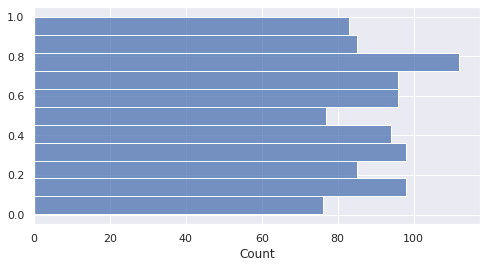

In [64]:
sns.histplot(y=synt)

From the output, we can see that the method np.random.random samples points from a uniform distribution between 0 and 1.
As previously mentioned, seaborn comes integrated with pandas. You can call any of its plotting methods specifying a dataframe to the `data` argument and a column name for the other parameters, like `x` in the previous cell. 

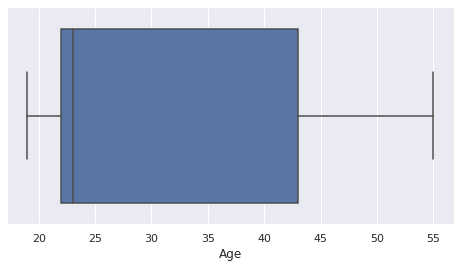

In [45]:
sns.boxplot(x="Age", data=toy_df)

Across almost all its functions, seaborn let's you easily separate the plot based on a variable of interest. You can specify it with the parameter `hue`:

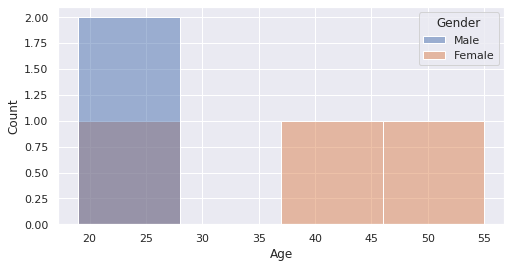

In [86]:
sns.histplot(x="Age", hue="Gender", data=toy_df)

---

Let's now analyze the real stroke dataset. Specifically, try to answer the following questions:

- Q1: what is the age distribution of patients?
- Q2: are there more male or female smokers?
- Q3: how is the age distributed for people who got stroke and those who did not?

In [71]:
#### TODO: YOUR CODE HERE (~10 minutes)

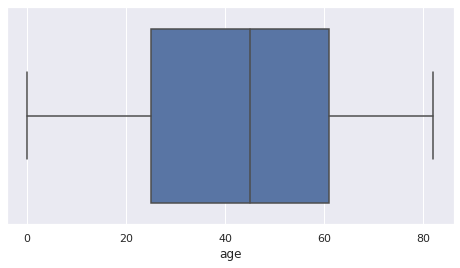

In [82]:
# Q1
sns.boxplot(x="age", data=stroke_df)

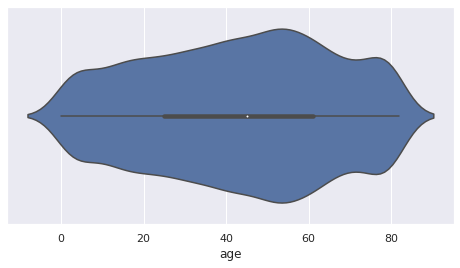

In [87]:
# Q1 alternative
sns.violinplot(x="age", data=stroke_df)

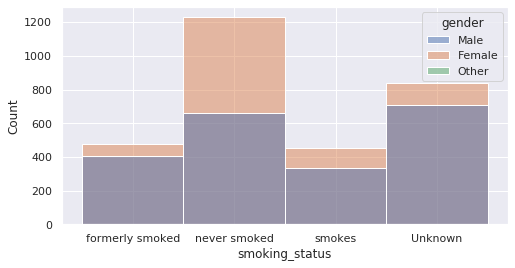

In [97]:
# Q2
sns.histplot(x="smoking_status", data=stroke_df, hue="gender")

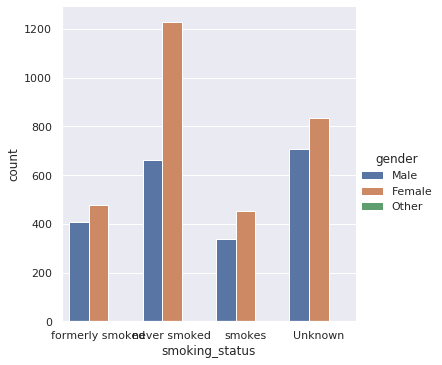

In [92]:
# Q2 alternative
sns.catplot(x="smoking_status", data=stroke_df, kind="count", hue="gender")

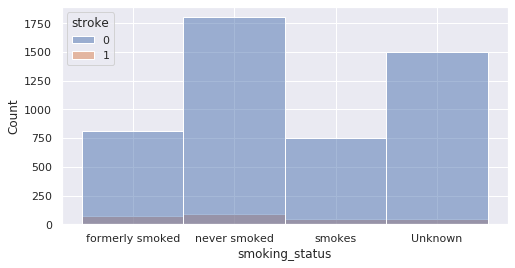

In [98]:
# Q3
sns.histplot(x="smoking_status", data=stroke_df, hue="stroke")

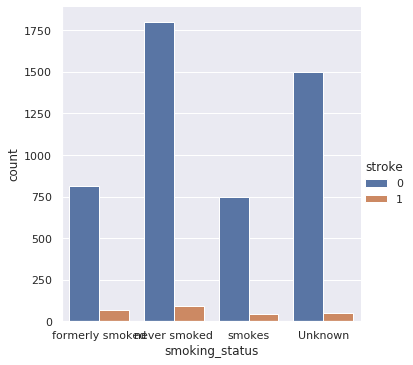

In [99]:
sns.catplot(x="smoking_status", data=stroke_df, kind="count", hue="stroke")

## Explore Data Correlation

Let's now focus on exploring data correlation in our dataset. We will mainly use scatterplot and, again, **displot**. The latter is a versatile function that accepts either a single or two inputs.

Again, let's start with a few syntetic data points.

In [107]:
synt = np.random.normal(size=(1000, 2))
synt.shape

(1000, 2)

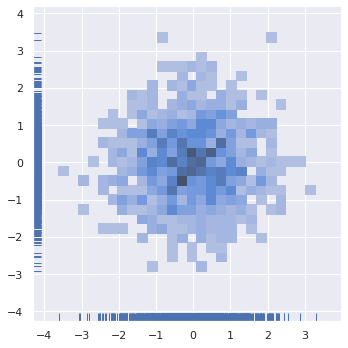

In [112]:
sns.displot(x=synt[:, 0], y=synt[:, 1], kind="hist", rug=True)

Here we changed the generator: np.random.normal, as per its name, draws data point from a normal distribution. The displot plots the first 1000 points (`synt[:, 0]`) on the horizontal axis and the second 1000 points (`synt[:, 1]`) on the vertical axis. The `rug=True` its a nice addition: it adds small segments corresponding to data points on a single dimension (mathematicians will tell you that those are the two marginal distributions).

Similarly, the **scatterplot** results in:

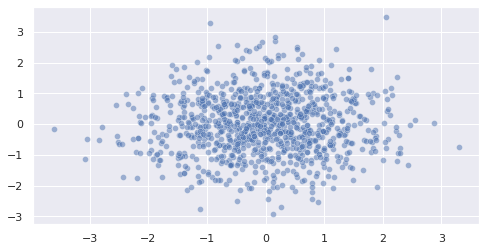

In [118]:
sns.scatterplot(x=synt[:, 0], y=synt[:, 1], alpha=0.5) # alpha: "opacity"

---

Let's now analyze the real stroke dataset. Specifically, try to answer the following questions:

- Q1: what is the correlation between the body mass index and average glucose level?
- Q2: what is the correlation between the body mass index and average glucose level, separately by stroke yes/no?
- Q3: what it the correlation between the body mass index, the average glucose level, and the age?
- Q4: what it the correlation between the body mass index, the average glucose level, the age, and the probability of get stroke?

*Note: to answer Q2 and Q3 dive into the documentation of scatterplot/displot and search for color and/or size*

In [71]:
#### TODO: YOUR CODE HERE (~10 minutes)

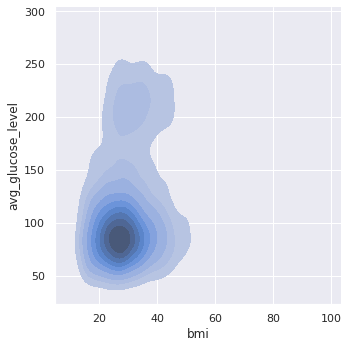

In [129]:
# Q1
sns.displot(x="bmi", y="avg_glucose_level", data=stroke_df, kind="kde", fill=True)

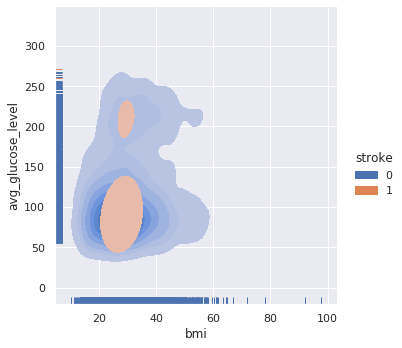

In [137]:
# Q2
sns.displot(x="bmi", y="avg_glucose_level", data=stroke_df, kind="kde", hue="stroke", fill=True, rug=True)

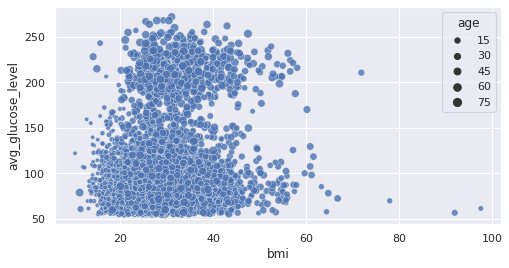

In [132]:
# Q3
sns.scatterplot(x="bmi", y="avg_glucose_level", data=stroke_df, size="age", alpha=0.8)

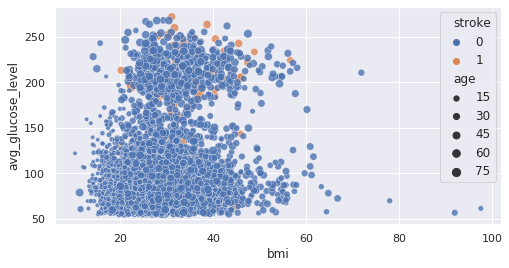

In [143]:
# Q4
sns.scatterplot(x="bmi", y="avg_glucose_level", data=stroke_df, size="age", alpha=0.8, hue="stroke")

# Exercise 3. Time series

# Conclusion (and what we have left behind)

# Bonus. Dimensionality Reduction

# Credits

This notebook was created by [Giuseppe Attanasio](https://gattanasio.cc), PhD student @ Politecnico di Torino.
You are free to download, edit and publish newer versions of the notebook.

Credit to *fedesoriano* for sharing the Stroke Prediction Dataset on Kaggle.
Ticker data is retrieved from Yahoo Finance.

*v1: 02/05/2021*
